   
  # EMOJIFY - Aplikacija za prepoznavanje emocija


Ideja projekta zasniva se na pravljenju modela mašinskog učenja koji će prepoznavati emociju ispitanika na osnovu priloženog video zapisa. Prilikom izrade projekta ćemo koristiti konvolutivne neuronske mreže (*CNN*) i pomoću njih napraviti program koji prilikom obrade video zapisa prepoznaje lica i njihove emocije, te prikazuje emotikon koji odgovara detektovanoj emociji.

Pre početka implementacije modela, upoznaćemo se sa terminima neuronskih i konvolutivnih neuronskih mreža, a zatim napraviti model i testirati ga na video zapisima koje smo priložili.

   
  ## Neuronske mreže


Neuronske mreže su jedan od najnaprednijih i najšire korišćenih modela mašinskog učenja. Motivacija za njihovo nastajanje može se pronaći u modelu biološkog neurona, a cilj u ideji da ovaj model oponaša učenje svojstveno živim bićima, a ponajviše čoveku. Mogu se koristiti u regresionim i klasifikacionim problemima, imaju sposobnost nelinearnog razdvajanja podataka, pa su pronašle veliku primenu u obradi podataka i rešavanju različitih zadataka iz oblasti mašinskog i dubokog učenja. Osnovna podela neuronskih mreža može se izvršiti na osnovu njihove primene:

* *Potpuno povezane neuronske mreže* - Osnovni tip neuronske mreže

* *Konvolutivne neuronske mreže* - Tip neuronske mreže koji se koristi u obradi slika i drugih vrsta signala 

* *Rekurentne neuronske mreže* - Tip neuronske mreže koji se koristi u obradi podataka nalik nizovima promenljive dužine

* *Grafovske neuronske mreže*  - Tip neuronske mreže koji se koristi za obradu podataka koji se predstavljaju grafovima


Neuronska mreža se sastoji od računskih jedinica (neurona) koje predstavljaju jednostavne parametrizovane funkcije. Svaka jedinica računa linearnu kombinaciju svojih argumenata i nad njom računa nelinearnu transformaciju koja se naziva aktivaciona funkcija. One su organizovane u slojeve tako da jedinice jednog sloja kao svoje argumente primaju vrednosti svih jedinica prethodnog sloja. Slojevi čije jedinice prosleđuju svoje vrednosti (izlaze) drugim jedinicama nazivaju se skriveni slojevi. Vrednosti jedinica skrivenih slojeva mreže mogu se smatrati novim prediktorima tih objekata nad kojima ostatak neuronske mreže uči aproksimaciju ciljane funkcije. Svaki sloj se nadograđuje nad prethodnim i tim postupkom gradi sve složenije prediktore.

Prilikom konstrukcije neuronske mreže svaka od računskih jedinica (neurona) prima ulazne vrednosti, množi ih težinama, te sumira težinske vrednosti i dodaje *Bias* - konstantnu vrednost koja se dodaje/množi sa ulazima kako bi se omogućila veća fleksibilnost i sposobnost modeliranja različitih funkcija. Na prethodno modifikovane ulaze primenjuje se aktivaciona funkcija kako bi se generisala izlazna vrednost. Iako u formulaciji modela neuronske mreže nije jasno naznačeno koju aktivacionu funkciju treba koristiti, najčešće se upotrebljavaju:

 * *Sigmnoidna funkcija:* $\sigma (x) = \frac{1}{1+e^{-x}}$,
 * *Hiperbolički tangens:* $ \tanh (x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$
 * *ReLu (*Rectified Linear Unit*):* $\max(0,x)$



Za treniranje neuronskih mreža prvo koristimo propagaciju unapred - proces manipulacije podacima prilikom ulaza u sloj koji smo upravo opisali, a zatim propagaciju unazad. Ovim procesom se, nakon generisanja izlazne vrednosti, poređenjem stvarnih i željenih vrednosti, računa greška, te se gradijenti greške propagiraju unazad kroz mrežu koristeći lančano pravilo izvoda i tom prilikom ažuriraju težine svakog sloja u cilju minimizacije greške. Propagacija unazad se interativno ponavlja i njom se mreža prilagođava i uči boljoj reprezentaciji podataka tokom svog treninga.

Za optimizaciju neuronske mreže koristimo gradijentni spust koji se primenjuje na funkciju gubitaka kako bi se pronašao minimum te funkcije. Gradijent nam pokazuje najbliži spust do lokalnog minimuma, te je ideja gradijentnog spusta da, počevši od neke tačke, u konačnom nizu koraka možemo stići do minimuma funkcije. U situacijama kada nije moguće pronaći minimum gorenavedene funkcije (gradijenti postanu veoma mali ili veliki), pribegavamo metodama poput Adamovog spusta za njegovo pronalaženje.

Preduslov za izgradnju uspešnog modela neuronske mreže je veliki skup podataka za njihovo obučavanje. Kako postojanje više skrivenih slojeva neuronskih mreža dovodi do toga da se od polaznih prediktora konstruišu novi, u situaciji kada se podaci nalaze u sirovom obliku preporučuje se korišćenje neuronskih mreža. Valja napomenuti da one imaju i sposobnost odabira najznačajnijih prediktora.

Glavna mana ovog modela jeste dužina procesa obučavanja. Takođe, u slučaju male količine podataka neuronske mreže su sklone preprilagođavanju i ključna prednost neuronskih mreža, tj. sposobnost samostalne konstrukcije novih atributa nad sirovom reprezentacijom padataka, ne dolazi do izražaja, te se u tim situacijama njihovo korišćenje ne preporučuje.

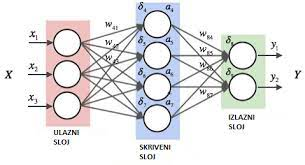

### Konvolutivne neuronske mreže

Konvolutivne neuronske mreže zasnivaju se na sposobnosti mreža da konstruišu prediktore iz sirovih signala. Ovaj specijalizovani tip neuronskih mreža dizajniran je za obradu i analizu podataka sa prostornom strukturom, poput slika. Ideja modela zasniva se na tome da filtere koji se standardno koriste u obradi signala (filter za detekciju ivice i sl.) možemo učiti iz podataka. Dakle, konvolutivne mreže ne zahtevaju ljudske resurse prilikom definisanja relevantnih svojstava signala, već, u zavisnosti od problema, određuju relevantna svojstva kroz učenje određenih filtera čijom se konvolutivnom primenom detektuju svojstva signala. Valja napomenuti da goreopisana fleksibilnost konvolutivnih mreža podrazumeva izazove prilikom optimizacije i veliku količinu podataka.

Prilikom obrade slika, potrebno je od najsitnijih detalja (uspravne, kose, horizontalne linije), koji su obično detektovani u nižim slojevima mreže, iskonstruisati složenije oblike kao što su delovi lica, te model možemo klasifikovati u duboke neuronske mreže.

Struktura konvolutivne mreže obično podrazumeva smenjivanje dve vrste slojeva - konvolutivnih slojeva i slojeva agregacije, pri čemu je moguće da se ista vrsta sloja ponovi više puta. Konvolutivni sloj mreže ima ulogu konstrukcije novih prediktora. Svaki konvolutivni sloj raspolaže nizom parametrizovanih filtera koji utvrđuju postojanje objekta na slici na osnovu informacija (npr. specifičnog rasporeda linija) koje detektuje prethodni konvolutivni sloj. Filteri imaju svoje specifične uloge definisane parametrima koji bivaju naučeni u procesu obučavanja mreže i predstavljaju njene parametre. Skup filtera se primenjuje na ulazne podatke i omogućava mreži da detektuje lokalne obrasce i karakteristike. Konvolucija sa filterom se realizuje jedinicama koje su organizovane u niz (jednodimenzioni signal poput zvuka) ili matricu (slika) i dele vrednosti parametra. Kako jedinice u jednom sloju imaju iste koeficijente, dejstvo konvolutivnog sloja možemo predstaviti kao konvoluciju prethodnog sloja sa jedinicom definisanom parametrima tekućeg sloja - tj. prevlačenje filtera duž slike i izračunavanje vrednosti koju filter daje na svakoj poziciji. Filter može delovati nad više kanala prethodnog sloja odjednom implementacijom višekanalne operacije konvolucije. 

Agregacioni sloj mreže ukrupnjuje informacije dobijene iz prethodnog sloja računajući neku od funkcija agregacije (maksimum ili prosek) susednih jedinica prethodnog sloja. Ukoliko određeni broj jedinica prethodnog sloja predstavlja ulaznu vrednost u jedinicu agregacionog sloja dolazi do zanemarivanja informacije o tome gde je svojstvo (npr. uspravna linija) pronađeno, ali se ne gubi informacija da je pronađeno. Prilikom pravljenja modela, gorepomenuti gubitak ne utiče na ishod. Takođe, jednom kanalu konvolucije odgovara jedan kanal agregacije.  Agregacioni slojevi redukuju izlazne podatke smanjujući prostornu dimenzionalnost i izdvajajući najvažnije informacije. Uloga ovog sloja je smanjenje broja računskih operacija u višim slojevima i smanjenje broja parametara u potpuno povezanoj mreži koja se nadovezuje na slojeve konvolucije i agregacije. Ovaj proces smanjuje probleme prilikom optimizacije, kao i fleksibilnost modela. 

Snaga konvolutivnih neuronskih mreža leži u njihovoj sposobnosti da izdvoje i lokalne i globalne karakteristike slike. Kroz upotrebu više konvolutivnih i agregacionih slojeva, konvolutivne neuronske mreže postepeno uče više nivoe reprezentacija koji nose informaciju o sve složenijim i apstraktnijim karakteristikama. Ova hijerarhijska ekstrakcija karakteristika im omogućava efikasno reagovanje na varijacije u poziciji, skali i orijentaciji objekata, što ih čini vrlo pogodnim za vizuelne zadatke.

Arhitektura konvolutivnih neuronskih mreža obično se sastoji od više konvolutivnih slojeva, praćenih potpuno povezanim slojevima i izlaznim slojem. Potpuno povezani slojevi integrišu izdvojene karakteristike i vrše konačna predviđanja. Parametri konvolutivnih neuronskih mreža, uključujući težine filtera i pristrasnosti, uče se kroz proces treniranja. Konvolutivne neuronske mreža se često treniraju koristeći velike anotirane skupove podataka, poput ImageNet-a , i napredne tehnike optimizacije, poput stohastičkog gradijentnog spusta, a često primenjuje i prenosno učenje.

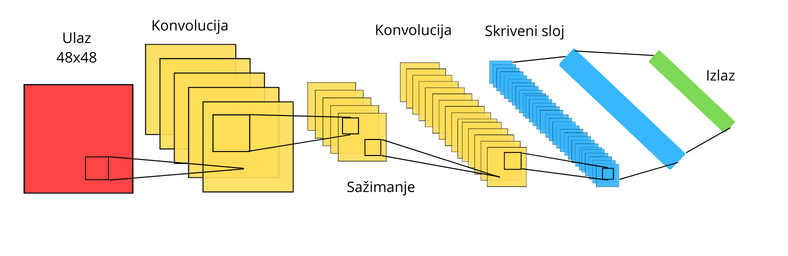

Pored navedenih slojeva, u arhitekturi konvolutivnih i drugih neuronskoj mreža, javlja se sloj za izbacivanje(dropout). Ovaj sloj omogućava izbacivanje određenog procenta neurona u mreži tokom svake epohe treninga, tako da oni ne doprinose računanju izlaza ili učenju. Verovatnoća isključivanja se postavlja kao hiperparametar i obično je u opsegu od 0,2 do 0,5. Glavna uloga ovog sloja je da spreči preprilagođavanje(overfitting) modela, a može da doprinese i smanjenju kompleksnosti, kao i smanjenju vremena treniranja modela. Važno je napomenuti da se sloj za izbacivanje primenjuje najčešće samo tokom treninga, a ne tokom testiranja ili upotrebe modela na stvarnim podacima. Tokom testiranja, svi neuroni su aktivni kako bi se dobili tačni rezultati.

# Implementacija modela

Koristimo FER-2013 bazu podataka koju smo preuzeli sa sajta https://www.kaggle.com/datasets/msambare/fer2013. Podaci se sastoje od crno-belih slika lica dimenzija 48x48 piksela. Lica na slikama su centrirana i zauzimaju približno isto mesto na svakoj slici. Baza je unapred podeljena na trening i test skup. Trening skup sadrži 28,709 primera, dok test skup sadrži 7,178 primera.

Emocije koje su prikazane na slikama su:
 * Besan/Besna (*Angry*)
 * Zgrožen/Zgrožena (*Disgusted*)
 * Uplašen/Uplašena (*Fearful*)
 * Srećan/Srećna (*Happy*)
 * Neutralan/Neutralna (*Neutral*)
 * Tužan/Tužna (*Sad*)
 * Iznenađen/Iznenađena (*Surprised*)


### Učitavanje neophodnih biblioteka:

Koristimo standardne biblioteke za statističku obradu podataka, njihov grafički prikaz i implementaciju neuronskih mreža.

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tkinter as tk
from tkinter import *
from PIL import Image
from PIL import ImageTk
import os
import threading

### Učitavanje podataka iz baze:

U sledećem delu koda, sprovodimo proces pripreme podataka za naš trening i test skup. 
U komentarima u kodu pružili smo detaljnu analizu svakog koraka ovog procesa.

In [8]:
#Definišemo putanje do direktorijuma sa trening i test podacima. 
#Očekuje se da se u ovim direktorijumima nalaze poddirektorijumi sa slikama, 
#gde svaki poddirektorijum predstavlja jednu klasu emocije.
train_dir = 'Data/train'
test_dir = 'Data/test'


#Koristimo ImageDataGenerator objekte za obradu slika. 
#Ova obrada uključuje skaliranje vrednosti piksela 
#sa opsega [0, 255] na [0, 1] radi normalizacije.
train_datagenerator = ImageDataGenerator(rescale=1./255)
test_datagenerator = ImageDataGenerator(rescale=1./255)



#Koristimo flow_from_directory metodu kako bismo generirali podatke za trening.
train_generator = train_datagenerator.flow_from_directory(
        train_dir,
        target_size=(48,48),     #Postavljamo veličinu slika na 48x48 piksela.
        batch_size=64,           #Definišemo veličinu paketića (batch size) za obradu slika.
        color_mode="grayscale",  #Postavljamo mod na "grayscale" kako bismo osigurali da se slike interpretiraju kao crno-bele.
        class_mode='categorical')#Označavamo da se radi o višeklasnoj klasifikaciji.

#Analogno generišemo podatke ta test.
test_generator = test_datagenerator.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Konstrukcija arhitekture neuronske mreže:

U sledećem delu koda, kreiramo model za prepoznavanje emocija na licima koristeći konvolucijske neuronske mreže (*CNN*).  
Kao i malopre, u komentarima u kodu pružili smo detaljnu analizu svakog koraka ovog procesa.

In [9]:

recognition_model = Sequential()

#Konvolutivni deo arhitekture:

recognition_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
    #Dodaje se konvolucioni sloj sa 32 filtera veličine (3,3) i aktivacionom funkcijom ReLU. 
    #Ovaj sloj je prvi u mreži i ima ulaznu dimenziju (48,48,1), 
    #što znači da prima slike veličine 48x48 piksela u crno-beloj (1 kanal) formi.
recognition_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    #Dodaje se drugi konvolucioni sloj sa 64 filtera i aktivacionom funkcijom ReLU.
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
    #Dodaje se sloj za maksimalno uzorkovanje (pooling) sa faktorom uzorkovanja (2,2), 
    #što smanjuje prostornu dimenziju izlaza iz prethodnih konvolucijskih slojeva.
recognition_model.add(Dropout(0.25))
    #Dodaje se sloj za izbacivanje (dropout) sa verovatnoćom isključivanja neurona od 0.25.
recognition_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
recognition_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
recognition_model.add(MaxPooling2D(pool_size=(2, 2)))
recognition_model.add(Dropout(0.25))
    #Ponavlja se sličan obrazac dodavanja konvolucijskih, pooling i dropout slojeva 
    #kako bi se postigla dublja arhitektura

#Potpuno povezani deo arhitekture:

recognition_model.add(Flatten())
    #Dodaje se sloj za ravnanje (flatten) koji pretvara izlaz iz prethodnih slojeva u vektor
    #kako bi se pripremio za potpuno povezane slojeve.
recognition_model.add(Dense(1024, activation='relu'))
    #Dodaje se potpuno povezani sloj sa 1024 neurona i aktivacionom funkcijom ReLU.
recognition_model.add(Dropout(0.5))
    #Dodaje se još jedan sloj za ispadanje (dropout) sa verovatnoćom isključivanja neurona od 0.50.
recognition_model.add(Dense(7, activation='softmax'))
    #Dodaje se poslednji potpuno povezani sloj sa 7 neurona (broj klasa, odnosno emocija u našem slučaju) 
    #i aktivacionom funkcijom softmax, čime generiše verovatnoće za svaku od 7 klasa.

In [4]:
recognition_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

### Treniranje modela:

Ovaj deo koda se bavi kompilacijom i treniranjem modela za prepoznavanje emocija na licima. 
Treniranje modela traje nešto preko 5 sati.

In [4]:
#Postavljamo funkciju gubitna na kategoričku unakrsnu entropiju(*categorical_crossentropy*), što je najčešća funkcija gubitka za višeklasnu klasifikaciju.
#Za treniranje mreže koristimo optimizator *Adam* sa podešenim korakom učenja i stopom opadanja.
#Tokom treniranja modela pratićemo tačnost (*accuracy*) modela, što ćemo kasnije prikazati na grafiku
recognition_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])

recognition_model_info = recognition_model.fit(
        train_generator,               #Trening podaci
        steps_per_epoch=28709 // 64,   #Broj koraka po epohi. Ovde se deli broj trening primera sa brojem paketića (batch size).
        epochs=60,                     #Broj epoha, tj. broj iteracija kroz trening skup.
        validation_data=test_generator,#Podaci za validaciju
        validation_steps=7178 // 64)   #Broj koraka za validaciju, delimo broj test primera sa brojem paketiča(batch size).

Epoch 1/60
448/448 [==============================] - 402s 894ms/step - loss: 1.8088 - accuracy: 0.2581 - val_loss: 1.7278 - val_accuracy: 0.3277
Epoch 2/60
448/448 [==============================] - 378s 845ms/step - loss: 1.6444 - accuracy: 0.3553 - val_loss: 1.5641 - val_accuracy: 0.4081
Epoch 3/60
448/448 [==============================] - 371s 829ms/step - loss: 1.5397 - accuracy: 0.4045 - val_loss: 1.4775 - val_accuracy: 0.4372
Epoch 4/60
448/448 [==============================] - 358s 800ms/step - loss: 1.4694 - accuracy: 0.4378 - val_loss: 1.4105 - val_accuracy: 0.4648
Epoch 5/60
448/448 [==============================] - 299s 668ms/step - loss: 1.4124 - accuracy: 0.4612 - val_loss: 1.3708 - val_accuracy: 0.4820
Epoch 6/60
448/448 [==============================] - 311s 693ms/step - loss: 1.3567 - accuracy: 0.4833 - val_loss: 1.3201 - val_accuracy: 0.4975
Epoch 7/60
448/448 [==============================] - 325s 726ms/step - loss: 1.3116 - accuracy: 0.5027 - val_loss: 1.2815 -

In [12]:
recognition_model.save_weights('recognition_model.h5')
    #Čuvano težine da ne bismo morali da pokrećemo program iznova

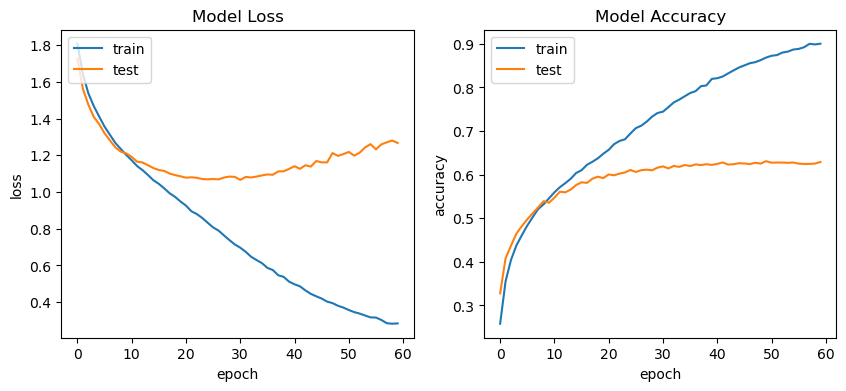

In [11]:

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Model Loss')
plt.plot(recognition_model_info.history['loss'])
plt.plot(recognition_model_info.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.title('Model Accuracy')
plt.plot(recognition_model_info.history['accuracy'])
plt.plot(recognition_model_info.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

### Konstrukcija grafičkog interfejsa:

Korišćenjem narednog koda pokrećemo grafički interfejs.

Datoteka *haarcascade_frontalface_default.xml*, koju smo koristili u kodu, služi za prepoznavanje lica u slikama ili videozapisima. Ova datoteka sadrži opise karakteristika lica koje se traže u ulaznim slikama kako bi se prepoznala prisutnost i pozicija lica.

Kod nećemo detaljno komentarisati.

In [ ]:
emotions = {0: "   Angry   ", 1: "Disgusted", 2: "  Fearful  ", 3: "   Happy   ", 4: "  Neutral  ", 5: "    Sad   ", 6: "Surprised"}
emojis = {0:"emojis/Angry.png", 1:"emojis/Disgusted.png", 2:"emojis/Fearful.png", 3:"emojis/Happy.png", 4:"emojis/Neutral.png", 5:"emojis/Sad.png", 6:"emojis/Surprised.png"}

global last_frame1                                    
last_frame1 = np.zeros((480, 640, 3), dtype=np.uint8)
global cap1
show_text=[0]
global frame_number

def load_video():
    global cap1
    
    #ukoliko želimo da program prepoznaje emocije na osnovu video zapisa koristimo ovu liniju koda
    cap1 = cv2.VideoCapture('putanja\naziv_videa.mp4')
    #ukoliko želimo da program prepoznaje emocije sa web kamere koristimo ovu liniju koda
    #cap1 = cv2.VideoCapture(0) 
    
    if not cap1.isOpened():
        print("Video not found, cannot open the camera")
    global frame_number
    length = int(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_number += 1
    if frame_number >= length:
        exit()
        
    cap1.set(1, frame_number)    
    flag1, frame1 = cap1.read()
    frame1 = cv2.resize(frame1,(400,500))
    bound_box = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    n_faces = bound_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in n_faces:
        cv2.rectangle(frame1, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_frame = gray_frame[y:y + h, x:x + w]
        crop_img = np.expand_dims(np.expand_dims(cv2.resize(roi_frame, (48, 48)), -1), 0)
        prediction = recognition_model.predict(crop_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame1, emotion[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        show_text[0]=maxindex

    if flag1 is None:
        print ("Error!")

    elif flag1:
        global last_frame1
        last_frame1 = frame1.copy()
        pic = cv2.cvtColor(last_frame1, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(pic)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        root.update()
        lmain.after(1, load_video)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        exit()
        
        
def load_emoji():
    frame2=cv2.imread(emoji[show_text[0]])
    pic2=cv2.cvtColor(frame2,cv2.COLOR_BGR2RGB)
    img2=Image.fromarray(frame2)
    imgtk2=ImageTk.PhotoImage(image=img2)
    lmain2.imgtk2=imgtk2
    lmain2.configure(image=imgtk2)
    lmain2.after(1, load_emoji)

In [ ]:
if __name__ == '__main__':
    frame_number = 0
    root=tk.Tk()
    lmain = tk.Label(master=root,padx=50,bd=10)
    lmain2 = tk.Label(master=root,bd=10)
    lmain.pack(side=LEFT)
    lmain.place(x=50,y=120)
    lmain2.pack(side=RIGHT)
    lmain2.place(x=800,y=70)
    root.title("Emojify")
    root.geometry("1400x900+100+10")
    root['bg']='black'
    exitbutton = Button(root, text='QUIT',fg="red",command=root.destroy,font=('arial',25,'bold')).pack(side = BOTTOM)
    threading.Thread(target=load_video).start()
    threading.Thread(target=load_emoji).start()
    root.mainloop()

### Testiranje modela na realnim podacima:

Na snimcima ekrana prikazujemo kako izgleda grafički interfejs i testiramo da li program uspešno prepoznaje lica i njihove emocije.

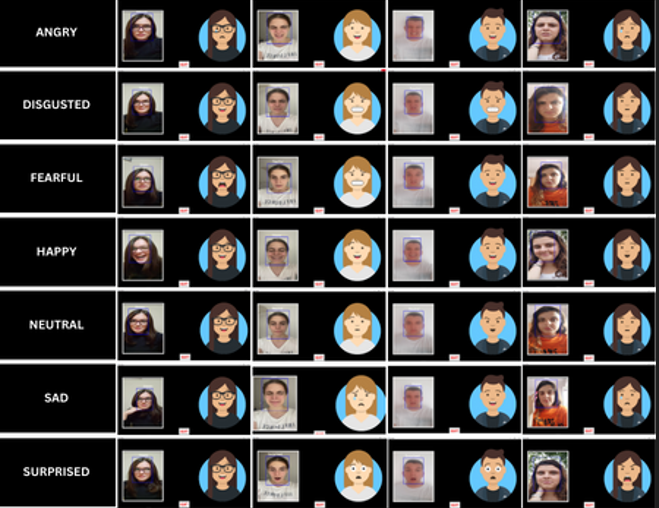

Na osnovu ovih primera možemo primetiti da naša neuronska mreža nije dobra u prepoznavanju emocija lica koja nose naočare. Direktnim pregledom baze podataka, primećujemo da ima malo fotografija lica sa naočarima, što objašnjava ovaj zaključak. Takođe, možemo zaključiti da ona veoma dobro prepoznaje otvorena usta, što ukazuje na prepoznavanje sreće i besa, ali ne može pouzdano naći razliku između njih. Ostale emocije prepoznaje sa samo delimičnom tačnošću, što nije neočekivan zaključak jer vrednosti parametra tačnosti (*accuracy*) na test skupu iznosi oko 0,6. Očekivali bismo da bismo mogli dobiti bolji rezultat ako bismo imali fotografije sa većom rezolucijom ili eventualno u RGB formatu. 

Važno je istaći da neuspešno prepoznavanje emocija na određenim fotografijama takođe može biti posledica toga da modeli sa primera nisu uvek uspešno izrazili svoju emociju.


### Literatura

 -  Mladen Nikolić, Anđelka Zečević (2019). *Mašinsko učenje.* Matematički fakultet., 1st ed.
 -  Charu C. Aggarwal (2018).  *Neural Networks and Deep Learning: A Textbook.* Springer International Publishing., 1st ed.
 -  Stefan Weninger (2021). *Deep Learning for Emotion Recognition:A Review*. Faculty of Electrical Engineering and Information Technology, University of Žilina., 1st ed.

#### *Ovaj projekat su pisali:*

*Natalija Lazić, Dejana Miladinović, Staša Tonić i Ognjen Đuković.*